In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
class gridworld:

    def __init__(self):
        self.dim = [7, 7]
        self.pos_A = [0, 0]
        self.rew_A = 15

        # Define starting position
        self.start = [4, 4]
        self.s = self.start[:]
        self.reward = 0

        # Define the position of the walls here
        self.walls = [[2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [4, 1], [4, 2], [4, 3], [4, 5], [5, 1], [5, 3], [5, 5], [6, 1], [6, 2], [6, 3]]

        # Step count
        self.n = 0
        self.action_space = ['U', 'L', 'D', 'R']
        self.action_prob = [0.25, 0.25, 0.25, 0.25]

    def show_grid(self, v=None, trail=None):
      # Print rows
      for i in range(self.dim[0]):
          print("-" * (self.dim[1] * 5 + 1))
          row = []
          for j in range(self.dim[1]):
              if [i, j] in self.walls:
                  row.append("| W ")
              elif [i, j] == self.pos_A:
                  row.append("| * ")
              elif [i, j] == self.start:
                  row.append("| S ")
              else:
                  arrow = ' '
                  if v is not None and trail is not None:
                      if trail[i, j] == 1:
                          max_action = np.argmax(v[i, j])
                          if max_action == 0:
                              arrow = '↑'
                          elif max_action == 1:
                              arrow = '←'
                          elif max_action == 2:
                              arrow = '↓'
                          elif max_action == 3:
                              arrow = '→'
                  row.append(f"| {arrow} ")
          row.append("|  ")
          print(' '.join(row))
      print("-" * (self.dim[1] * 5 + 1))


    def get_arrow(self, action):
        arrows = ['↑', '←', '↓', '→']
        return arrows[action]


    # Show state
    def show_state(self):
        # print rows
        for i in range(self.dim[0]):
            print("-" * (self.dim[0] * 5 + 1))
            row = []
            for j in range(self.dim[1]):
                if [i, j] in self.walls:
                    row.append("| W ")
                elif i == self.s[0] and j == self.s[1]:
                    row.append("| X ")
                elif i == self.pos_A[0] and j == self.pos_A[1]:
                    row.append("| A ")
                else:
                    row.append("|   ")
            row.append("|  ")
            print(' '.join(row))
        print("-" * (self.dim[0] * 5 + 1))

    # Give the agent an action
    def action(self, a):
        if a not in self.action_space:
            return "Error: Invalid action submission"

        # Check if the action hits a wall
        next_s = self.s.copy()
        if a == "U":
            next_s[0] -= 1
        elif a == "L":
            next_s[1] -= 1
        elif a == "D":
            next_s[0] += 1
        elif a == "R":
            next_s[1] += 1

        if next_s in self.walls:
            self.reward = -1
        else:
            self.s = next_s
            self.reward = 0

        # Check for special transition states
        if self.s == self.pos_A:
            self.reward = self.rew_A

        self.n += 1
        return self.s, self.reward

    def reset(self):
        self.s = self.start
        self.reward = 0
        self.n = 0


In [53]:
grid = gridworld()
# grid.show_grid()

In [54]:
v = np.zeros((grid.dim[0], grid.dim[1]))
trail = np.zeros((grid.dim[0], grid.dim[1]))  # Trail of 0s indicating no visit yet
gamma = 0.9
delta = 1e-5
delta_t = 1

while delta_t > delta:
    v_new = np.zeros_like(v)
    for i in range(grid.dim[0]):
        for j in range(grid.dim[1]):
            for a in grid.action_space:
                grid.s = [i, j]
                s, r = grid.action(a)
                if s[0] >= 0 and s[0] < grid.dim[0] and s[1] >= 0 and s[1] < grid.dim[1]:
                    a_index = grid.action_space.index(a)
                    v_new[i, j] += grid.action_prob[a_index] * (r + gamma * v[s[0], s[1]])
                    trail[i, j] = 1  # Mark as visited in the trail
    delta_t = np.sum(np.abs(v - v_new))
    v = v_new.copy()

grid.show_grid(v, trail)
print(v.round(1))

q = np.zeros((grid.dim[0], grid.dim[1], len(grid.action_space)))
delta_t = 1

while delta_t > delta:
    q_old = q.copy()
    for i in range(grid.dim[0]):
        for j in range(grid.dim[1]):
            for a in grid.action_space:
                grid.s = [i, j]
                s, r = grid.action(a)
                if s[0] >= 0 and s[0] < grid.dim[0] and s[1] >= 0 and s[1] < grid.dim[1]:
                    a_index = grid.action_space.index(a)
                    q[i, j, a_index] = r + gamma * np.max(q_old[s[0], s[1]])
    delta_t = np.sum(np.abs(q - q_old))

print(np.max(q, axis=2).round(1))

------------------------------------
| *  | ↑  | ↑  | ↑  | ↑  | ↑  | ↑  |  
------------------------------------
| ↑  | ↑  | ↑  | ↑  | ↑  | ↑  | ↑  |  
------------------------------------
| ↑  | W  | W  | W  | W  | W  | ↑  |  
------------------------------------
| ↑  | ↑  | ↑  | ↑  | ↑  | ↑  | ↑  |  
------------------------------------
| ↑  | W  | W  | W  | S  | W  | ↑  |  
------------------------------------
| ↑  | W  | ↑  | W  | ↑  | W  | ↑  |  
------------------------------------
| ↑  | W  | W  | W  | ↑  | ↑  | ↑  |  
------------------------------------
[[  2.4   5.3   1.5   0.3  -0.1  -0.2  -0.1]
 [  5.2   3.    0.9  -0.1  -0.6  -0.6  -0.3]
 [  1.    0.1  -1.9  -2.4  -2.4  -1.4  -0.7]
 [ -0.5  -2.5  -3.4  -3.5  -3.   -2.5  -0.9]
 [ -0.7  -2.2  -6.4  -3.7  -3.3  -2.2  -0.8]
 [ -0.7  -5.3 -10.   -6.2  -2.8  -1.6  -0.6]
 [ -0.5  -1.1  -5.   -1.5  -1.4  -0.8  -0.3]]
[[ 71.1  78.9  71.1  63.9  57.6  51.8  46.6]
 [ 78.9  71.1  63.9  57.6  51.8  46.6  42. ]
 [ 71.1  63.9  57.6  51.8

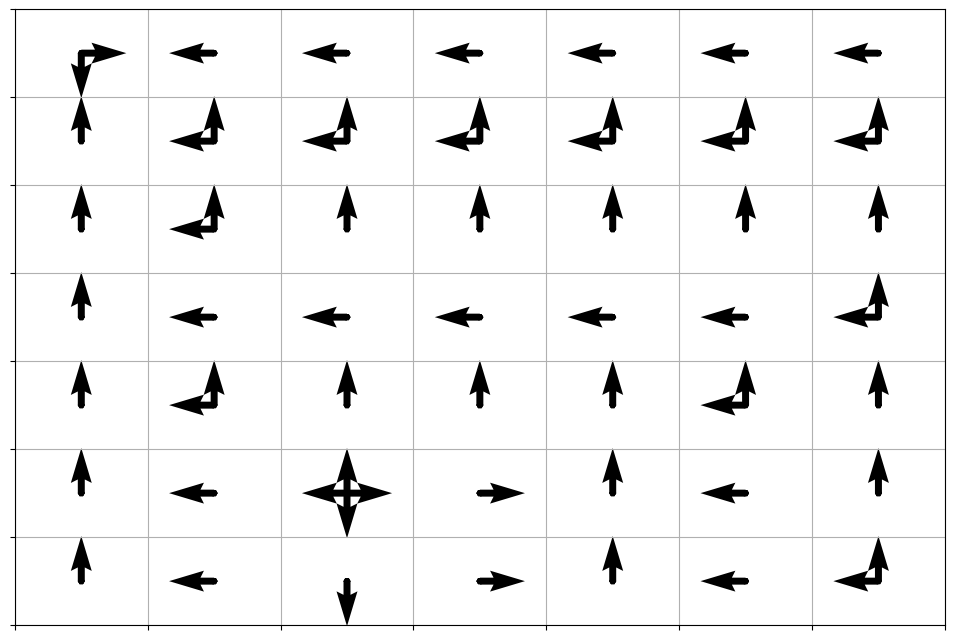

In [57]:
def opt_policy(q, grid):
    q_max = np.max(q, axis=2)
    x = np.linspace(0, grid.dim[0] - 1, grid.dim[0]) + 0.5
    y = np.linspace(grid.dim[1] - 1, 0, grid.dim[1]) + 0.5
    X, Y = np.meshgrid(x, y)
    zeros = np.zeros((grid.dim))

    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes()

    for i, action in enumerate(grid.action_space):
        q_star = np.zeros((7, 7))
        for j in range(grid.dim[0]):
            for k in reversed(range(grid.dim[1])):
                if q[j, k, i] == q_max[j, k]:
                    q_star[j, k] = 0.4
        # Plot results
        if action == "U":
            # Vectors point in positive Y-direction
            plt.quiver(X, Y, zeros, q_star, scale=1, units='xy')
        elif action == "L":
            # Vectors point in negative X-direction
            plt.quiver(X, Y, -q_star, zeros, scale=1, units='xy')
        elif action == "D":
            # Vectors point in negative Y-direction
            plt.quiver(X, Y, zeros, -q_star, scale=1, units='xy')
        elif action == "R":
            # Vectors point in positive X-direction
            plt.quiver(X, Y, q_star, zeros, scale=1, units='xy')

    plt.xlim([0, grid.dim[0]])
    plt.ylim([0, grid.dim[1]])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.grid()
    plt.show()

opt_policy(q, grid)
